<h1>Group Project: U.S. Medical Insurance Costs</h1>
<a id="top"></a>


Questions for the project:
* What factor is most correlated to cost?
* What is the average age of the patients in the dataset.
* What’s the regional breakdown of the patients?
* What’s the mean and median cost of smoker and non-smoker?
* Who pays the most for insurance and what factors into that decision?

<a href="#bottom">Shortcut to Conclusions</a>

In [22]:
# Import Libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the data from CSV file
df = pd.read_csv('insurance.csv')

<h1>Data Preview</h1>
Import insurance.csv into your Python file and preview the first 10 rows.

In [25]:
print(df.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


<h1>Basic Python Data:</h1>

<p>Below is a basic summary of the data from the data.</p>

In [49]:
import csv
import statistics
from collections import defaultdict, Counter

# Read CSV and convert values
with open('insurance.csv', 'r') as ins:
    reader = csv.DictReader(ins)
    data = list(reader)

# Convert values to proper types
for row in data:
    row['age'] = int(row['age'])
    row['children'] = int(row['children'])
    row['charges'] = float(row['charges'])

# Total patients
total_patients = len(data)

# Find the youngest and oldest patient
youngest = min(data, key=lambda x: x['age'])
oldest = max(data, key=lambda x: x['age'])
total_age = sum(x['age'] for x in data)
average_age = total_age / total_patients

# Prepare dictionary to collect ages by region
region_ages = defaultdict(list)
for row in data:
    region_ages[row['region']].append(row['age'])

# Find cheapest and most expensive charges
charges = [x['charges'] for x in data]

# Find cheapest and most expensive charges
cheapest = min(data, key=lambda x: x['charges'])
most_expensive = max(data, key=lambda x: x['charges'])
total_cost = sum(charges)
avg_cost = total_cost / total_patients
median_cost = statistics.median(charges)

# Smoker and Non-Smoker stats
smokers = [row for row in data if row['smoker'] == 'yes']
non_smokers = [row for row in data if row['smoker'] == 'no']
smoker_pct = len(smokers) / total_patients * 100
non_smoker_pct = len(non_smokers) / total_patients * 100

# Calculate mean and median for smokers
smoker_charges = [row['charges'] for row in smokers]
smoker_mean = statistics.mean(smoker_charges)
smoker_median = statistics.median(smoker_charges)

# Calculate mean and median for non-smokers
non_smoker_charges = [row['charges'] for row in non_smokers]
non_smoker_mean = statistics.mean(non_smoker_charges)
non_smoker_median = statistics.median(non_smoker_charges)

# Children stats
with_kids = sum(1 for row in data if row['children'] > 0)
without_kids = total_patients - with_kids
with_kids_pct = (with_kids / total_patients) * 100
without_kids_pct = (without_kids / total_patients) * 100

# Regional Count using Counter
region_counts = Counter(row['region'] for row in data)

# Print summary
print("Patient Summary:")
print(f"  Total Patients: {total_patients}")

# Print the results
print(f"  Youngest Patient: Age {youngest['age']}, Charges: ${youngest['charges']:,.2f}")
print(f"  Oldest Patient: Age {oldest['age']}, Charges: ${oldest['charges']:,.2f}")
print(f"  Average Age of Patients: {round(average_age)}\n")

# Calculate mean and median for each region
print("Mean and Median Age per Region:")
for region, ages in region_ages.items():
    avg = round(statistics.mean(ages), 1)
    med = round(statistics.median(ages), 1)
    print(f"  {region.capitalize(): <12} | Mean: {avg: >5} | Median: {med: >5}")
print()

# Costs
print("Cost Summary:")
print(f"  Cheapest Cost: ${cheapest['charges']:,.2f} (Age {cheapest['age']}, Smoker: {cheapest['smoker']})")
print(f"  Most Expensive: ${most_expensive['charges']:,.2f} (Age {most_expensive['age']}, Smoker: {most_expensive['smoker']})")
print(f"  Average Cost: ${avg_cost:,.0f}")
print(f"  Median Cost: ${median_cost:,.0f}\n")

# Print smoker and non-smoker costs
print("Smoker Cost Summary:")
print(f"  Mean Cost for Smokers: ${smoker_mean:,.0f}")
print(f"  Median Cost for Smokers: ${smoker_median:,.0f}")

print("\nNon-Smoker Cost Summary:")
print(f"  Mean Cost for Non-Smokers: ${non_smoker_mean:,.0f}")
print(f"  Median Cost for Non-Smokers: ${non_smoker_median:,.0f}\n")

# Print the region summary
print("Regional Summary:")
for region, count in region_counts.items():
    region_pct = (count / total_patients) * 100
    print(f"  {region.capitalize(): <12}: {count} ({region_pct:.2f}%)")

# Print smoker stats
print("\nSmoker Status:")
print(f"  Smokers: {smoker_pct:.2f}%")
print(f"  Non-Smokers: {non_smoker_pct:.2f}%\n")

# Print children stats
print("Children:")
print(f"  With Kids: {with_kids_pct:.2f}%")
print(f"  Without Kids: {without_kids_pct:.2f}%")


Patient Summary:
  Total Patients: 1338
  Youngest Patient: Age 18, Charges: $1,725.55
  Oldest Patient: Age 64, Charges: $30,166.62
  Average Age of Patients: 39

Mean and Median Age per Region:
  Southwest    | Mean:  39.5 | Median:    39
  Southeast    | Mean:  38.9 | Median:  39.0
  Northwest    | Mean:  39.2 | Median:    39
  Northeast    | Mean:  39.3 | Median:  39.5

Cost Summary:
  Cheapest Cost: $1,121.87 (Age 18, Smoker: no)
  Most Expensive: $63,770.43 (Age 54, Smoker: yes)
  Average Cost: $13,270
  Median Cost: $9,382

Smoker Cost Summary:
  Mean Cost for Smokers: $32,050
  Median Cost for Smokers: $34,456

Non-Smoker Cost Summary:
  Mean Cost for Non-Smokers: $8,434
  Median Cost for Non-Smokers: $7,345

Regional Summary:
  Southwest   : 325 (24.29%)
  Southeast   : 364 (27.20%)
  Northwest   : 325 (24.29%)
  Northeast   : 324 (24.22%)

Smoker Status:
  Smokers: 20.48%
  Non-Smokers: 79.52%

Children:
  With Kids: 57.10%
  Without Kids: 42.90%


<h1>Visualizing the Data</h1>
<p>My analysis suggests that the 'region' variable may not be a useful predictor in this sample, as the 'southeast' region has a disproportionately higher participation rate. This region also correlates with a higher number of smokers, which could skew the results.
</p>
<ul>
    <li>Coorelation Matrix</li>
    <li>Regional Breakdown of Patients</li>
    <li>Smoker Participation Percentage by Region</li>
    <li>Average BMI by Region</li>
    <li>Mean and Median Charges for Smokers and Non-Smokers</li>
</ul>

Correlation with 'charges':
charges: 1.000000
smoker_yes: 0.787251
age: 0.299008
bmi: 0.198341
region_southeast: 0.073982
children: 0.067998
sex_male: 0.057292
region_northwest: -0.039905
region_southwest: -0.043210


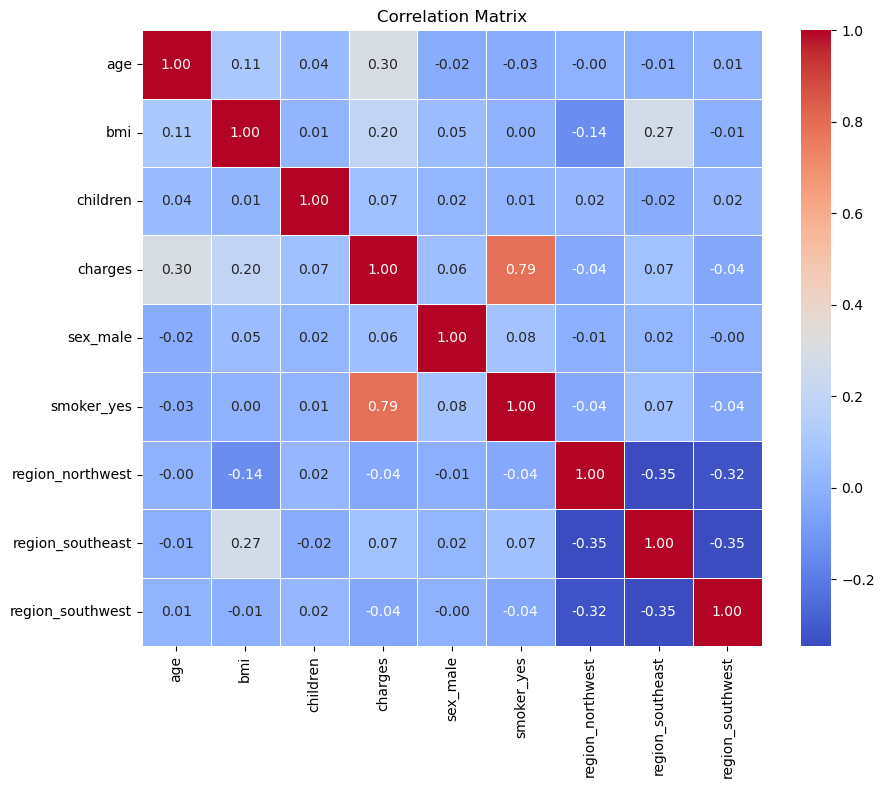


Linear Regression Coefficients (Feature Importance):
smoker_yes          : $23,848.53
children            : $475.50
bmi                 : $339.19
age                 : $256.86
sex_male            : $-131.31
region_northwest    : $-352.96
region_southwest    : $-960.05
region_southeast    : $-1,035.02


In [52]:
# Step 1: Convert categorical variables to numeric (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Step 2: Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Step 3: Print the correlation of all variables with 'charges'
correlation_with_charges = correlation_matrix['charges']

# Sort the correlation values in descending order
correlation_with_charges_sorted = correlation_with_charges.sort_values(ascending=False)

# Print each feature name with its correlation value, sorted by correlation
print("Correlation with 'charges':")
for feature, correlation in correlation_with_charges_sorted.items():
    print(f"{feature}: {correlation:.6f}")

# Step 4: Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Step 5: Perform linear regression to find feature importance
X = df_encoded.drop(columns=['charges'])  # all columns except 'charges'
y = df_encoded['charges']  # target variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients (importance of each feature)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Format coefficients as currency with $ and rounded to two decimal places
coefficients['Formatted Coefficient'] = coefficients['Coefficient'].apply(lambda x: f"${x:,.2f}")

# Sort by the coefficients in descending order (positive first, then negative)
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)

# Print the sorted coefficients
print("\nLinear Regression Coefficients (Feature Importance):")
for feature, value in coefficients_sorted['Formatted Coefficient'].items():
    print(f"{feature: <20}: {value}")


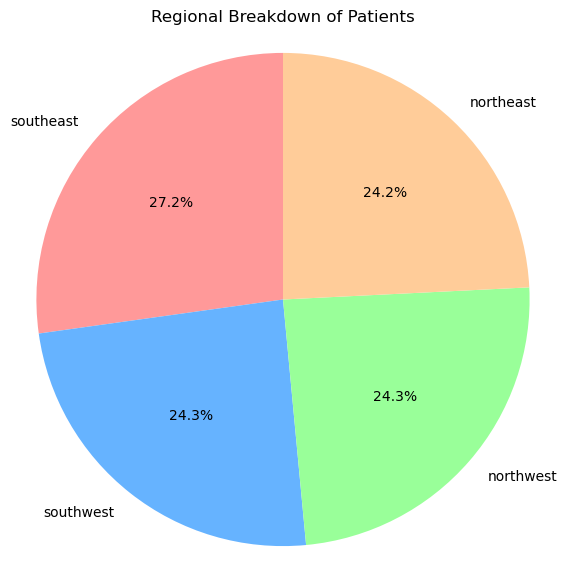

In [54]:
# Step 1: Count the occurrences of each region
region_counts = df['region'].value_counts()

# Step 2: Plot a pie chart of the region distribution
plt.figure(figsize=(7, 7))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Regional Breakdown of Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

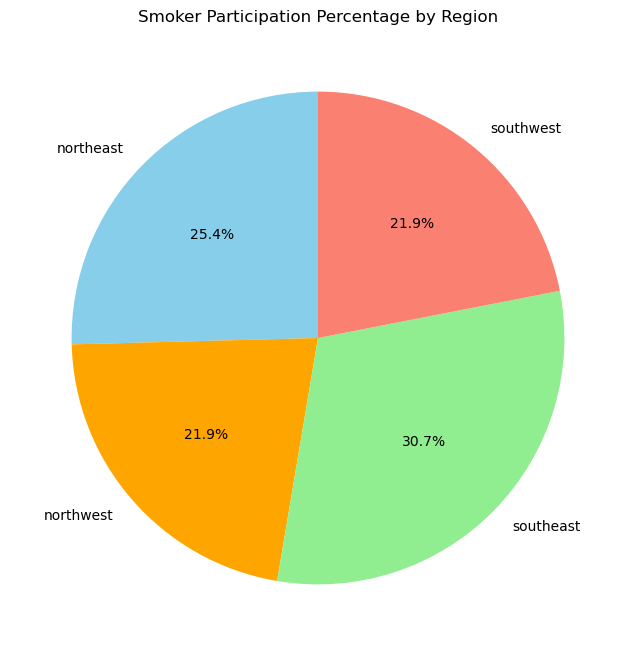

In [56]:
# Step 1: Filter the dataset for smokers
smoker_data = df[df['smoker'] == 'yes']

# Step 2: Group by region and count smokers
region_smoker_counts = smoker_data['region'].value_counts()

# Step 3: Group by region and count total patients (smokers and non-smokers)
region_total_counts = df['region'].value_counts()

# Step 4: Calculate the percentage of smokers in each region
smoker_percentage = (region_smoker_counts / region_total_counts) * 100

# Step 5: Create a pie chart
plt.figure(figsize=(8, 8))
smoker_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'lightgreen', 'salmon'])
plt.title('Smoker Participation Percentage by Region')
plt.ylabel('')  # Removes the 'Region' label on the side of the chart
plt.show()


Average BMI by Region:
northeast: 29.17
northwest: 29.20
southeast: 33.36
southwest: 30.60


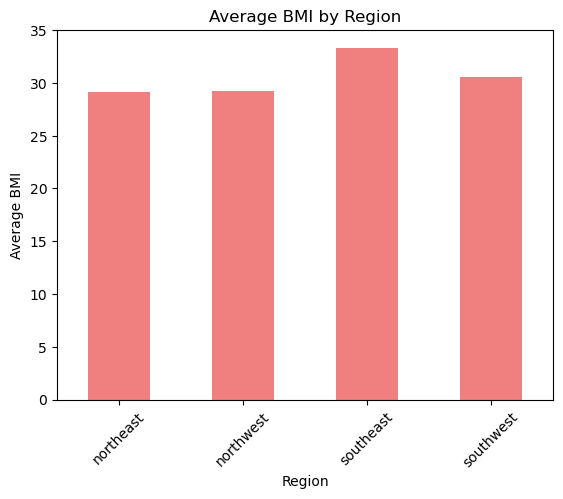

In [58]:
# Load the data from CSV file
df = pd.read_csv('insurance.csv')

# Step 1: Group by region and calculate the mean BMI for each region
bmi_by_region = df.groupby('region')['bmi'].mean()

# Step 2: Display the average BMI for each region
average_bmi_by_region = df.groupby('region')['bmi'].mean()
print("\nAverage BMI by Region:")
for region, bmi in average_bmi_by_region.items():
    print(f"{region}: {bmi:.2f}")

# Step 3: Visualize the average BMI by region in a bar chart
bmi_by_region.plot(kind='bar', color='lightcoral')
plt.title('Average BMI by Region')
plt.xlabel('Region')
plt.ylabel('Average BMI')
plt.xticks(rotation=45)
plt.show()


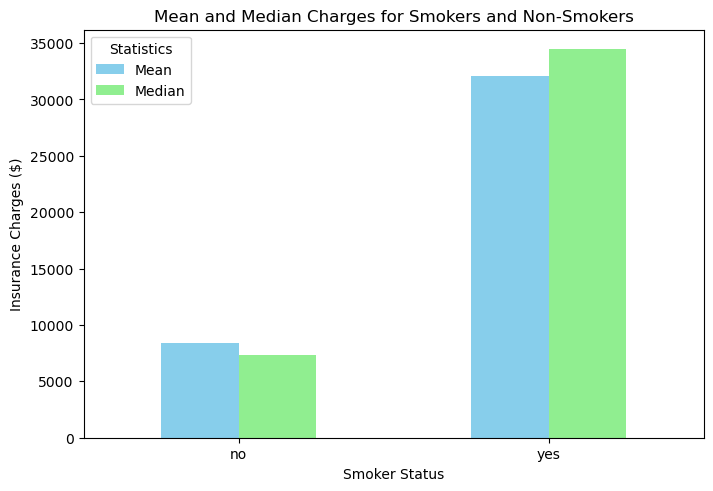

In [60]:
import matplotlib.pyplot as plt

# Calculate mean and median charges for smoker and non-smoker
smoker_stats = df.groupby('smoker')['charges'].agg(['mean', 'median'])

# Plotting the bar plot
ax = smoker_stats.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightgreen'])
plt.title('Mean and Median Charges for Smokers and Non-Smokers')
plt.ylabel('Insurance Charges ($)')
plt.xticks(rotation=0)
plt.xlabel('Smoker Status')

# Add a legend
plt.legend(title="Statistics", labels=["Mean", "Median"])

# Define space for the text below the graph
text_position_y = -0.15  # Adjust this value based on how far below you want the text

# Add the data below the graph as text
for i, (mean_value, median_value) in enumerate(zip(smoker_stats['mean'], smoker_stats['median'])):
    # Format mean and median values
    mean_text = f'Mean: ${mean_value:,.2f}'
    median_text = f'Median: ${median_value:,.2f}'

# Adjust the plot to ensure the text fits below
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()

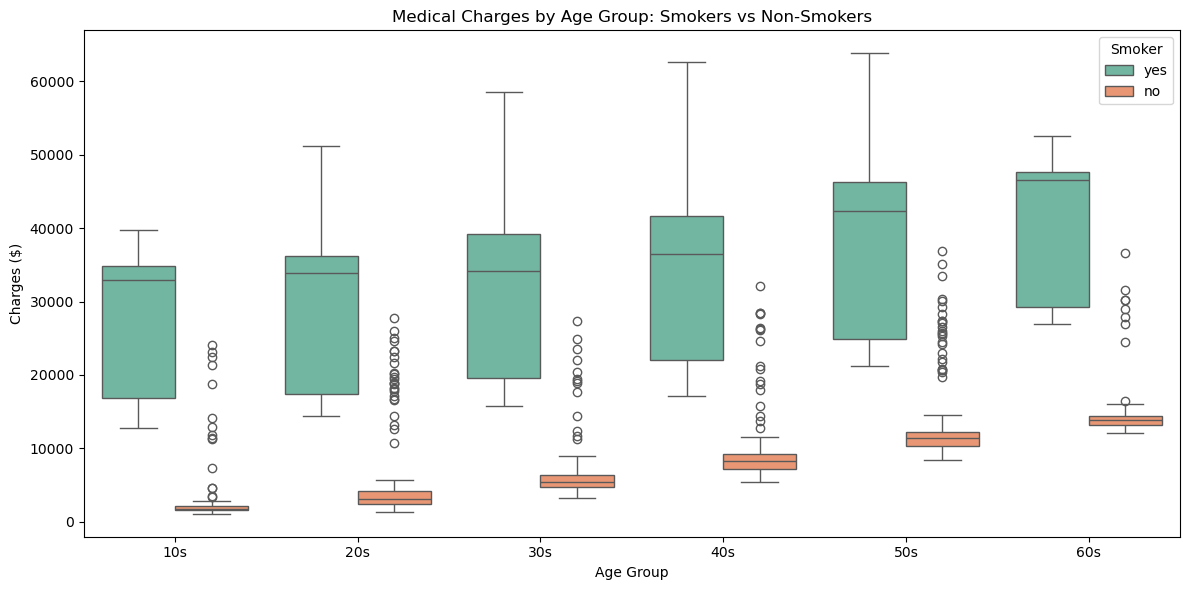

In [62]:
# Step 1: Create age groups for all patients
df['age_group'] = pd.cut(
    df['age'],
    bins=range(10, 71, 10),
    right=False,
    labels=['10s', '20s', '30s', '40s', '50s', '60s']
)

# Step 2: Filter only rows where age_group is not null (in case of edge cases)
df_filtered = df[df['age_group'].notna()].copy()

# Step 3: Create boxplot comparing smokers and non-smokers across age groups
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='age_group',
    y='charges',
    hue='smoker',
    data=df_filtered,
    palette='Set2'
)

# Step 4: Customize plot
plt.title('Medical Charges by Age Group: Smokers vs Non-Smokers')
plt.xlabel('Age Group')
plt.ylabel('Charges ($)')
plt.legend(title='Smoker')

plt.tight_layout()
plt.show()

# Conclusion
<a id='bottom'></a>


<p>Non-Smokers have a tighter distribution of costs with more outliers. The Smoking group has no statistical outliers. While Smokers and Non-Smokers have similar rare events. Smokers cost spread is already so high that those rare events don’t stand out as statistical outliers — while they do in the more "stable" non-smoker group.</p>
<p>The regional data contains a larger representation from the South East. This shows up as the group with the highest BMI and the highest occurance of smokers. We don't have enough data to conclude why. Age is not a factor, all regions have a similar age.</p>

Questions
* What factor is most correlated to cost?
    * In order of significance: Smoker, age, BMI. 
* What is the average age of the patients in the dataset.
    * 39 
* What’s the regional breakdown of the patients?
    *   Southwest | Mean: 39.5 | Median: 39
    *   Southeast | Mean: 38.9 | Median: 39.0
    *   Northwest | Mean: 39.2 | Median: 39
    *   Northeast | Mean: 39.3 | Median: 39.5
* What’s the mean and median cost of smoker and non-smoker?
    * Mean Cost for Smokers: \\$32,050, Median Cost for Smokers: \\$34,456
    * Mean Cost for Non-Smokers: \\$8,434, Median Cost for Non-Smokers: \\$7,345
* Who pays the most for insurance and what factors into that decision?
    * Smoker's pay the most, followed by age, then BMI. 

<a href="#top">Top</a>